<a href="https://colab.research.google.com/github/Sophiajackrich/Stutern-repo/blob/master/DATA_VISUALIZATION_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 (Week 5)

>**Note**: Late submissions are ***`penalized`***.

## Name: JACKRICH SOPHIA

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

### Download the data [here](https://drive.google.com/file/d/1BhBejDklCoqsqqAcvycA4n7AIpeRnych/view?usp=share_link)

### Problem Statement

**Customer Personality Analysis** is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Target
Need to perform **clustering** to summarize customer segments.

### Attributes

```
Attributes

People
------
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
--------
MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

Promotion
---------
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
-----
NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month
```

In [3]:
# load data 
file = "/content/marketing_campaign.csv"
df = pd.read_csv(file, sep="\t")

# copy data 
df1 = df.copy()
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


**BUILDING METHOD CHAINS FOR MY DATA VISUALIZATION**

In [4]:
# craete a histogram and count plot function
def plot_histogram(*, data: pd.DataFrame, feature: str, text: str = ""):
  """This returns a Seaborn Histogram."""
  sns.histplot(data=data, x=feature)
  plt.title(f"Distribution of {feature!r} {text}")
  plt.tight_layout()
  plt.show()

def display_count(data: pd.DataFrame, feature: str, hue: tp.Union[None, str] = None, rotation: int = 90) ->None:
  """This is used to make a count plot of the specified categorical variable.
  Params:

  data: Pandas DF
        The source DataFrame containing the variable.
  feature: str
        The numerical variable to plot.
  rotation: int, default=90
        The x-label ticks rotation in degrees.
  hue: None or str, default=None
        Should be something that can be interpreted by
        :func:`color_palette`, or a dictionary mapping
        hue levels to matplotlib colors.

  Returns:

  A Seaborn count plot
    """
  fig, ax = plt.subplots(figsize=(10, 6))
  sns.countplot(x=feature, data=data, hue=hue, ax=ax, palette="Paired")
  plt.xticks(rotation=rotation)
  ax.set_xlabel(f"{feature}", size=13)
  ax.set_title(f"Frequency Distribution of {feature!r}", size=15)
  ax.grid(visible=False)
  # Anotate the chart
  for bar in ax.patches:
    x_val = bar.get_x() + bar.get_width() / 2
    y_val = bar.get_height() # y_pos
    ax.annotate(
        text = y_val, # y pos
        xy=(x_val, y_val), # (x, y)
        xytext=(0, 6), #text position
        ha = "center", # horizontal alignment
        va = "center", # vertical alignment
        size=10, # text size
        textcoords="offset points",
        )
  fig.tight_layout()
  plt.show()

In [5]:
# check data info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# check for missing values 
df1.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# check for duplicates
df1.duplicated().sum()

0

In [8]:
# seperate cat and num data
num_data = df1.select_dtypes(include=[int, float])

# cat data
cat_data = df1.select_dtypes(include='O')

# print both data
num_data.shape, cat_data.shape

((2240, 26), (2240, 3))

In [9]:

# Analysing the Income 
df1.get("Income").isna().sum()

# checking the description
df1.get("Income").describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

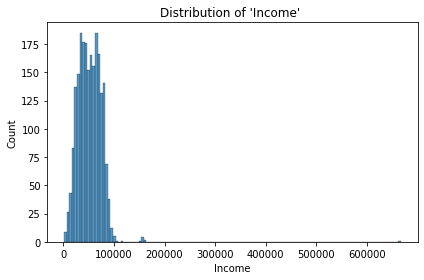

In [10]:
# Analyse the Income variable through a plot
plot_histogram(data=df1, feature="Income")
# Here it shows that there are bulk of values with variation from 0-100000, and there is an outlier value at the end

In [11]:
# Filling missing values
df1 = df.copy()

# Impute missing values
median_income = df1["Income"].median()
# fill na
df1["Income"] = df1["Income"].fillna(value=median_income)

# Verify
df1["Income"].isna().sum()

0

## Qs 1
* a) Find the average of all the total amount spent on products. Call this variable `Avg_amount`. 
* b) Convert the `Avg_amount` to deciles (0,1,2,...,9) by creating a new variable, `Avg_amount(weights)` such that the higher the Avg_score, the higher the weight.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

In [18]:
# create a list comprehension to filter only the product amounts in the numeric data
products = [var for var in df1.columns if "Mnt" in var]
df1[products].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [19]:
# 1a Find the average of all the total amount spent on products. Call this variable Avg_amount.
# get the total_amt of products
df1["Total_amt"] = df1[products].sum(axis=1)
print("Total Product Amount is:\n", df1["Total_amt"])
print()
# getting average of total product amount
df1["Avg_amt"] = np.round(df1[products].mean(axis=1), 2)
print("Average Amount is:\n", df1["Avg_amt"])

Total Product Amount is:
 0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_amt, Length: 2240, dtype: int64

Average Amount is:
 0       269.50
1         4.50
2       129.33
3         8.83
4        70.33
         ...  
2235    223.50
2236     74.00
2237    206.83
2238    140.50
2239     28.67
Name: Avg_amt, Length: 2240, dtype: float64


In [22]:
df1.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_amt,Avg_amt,Avg_amount(weights)
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,269.5,"(256.033, 420.83]"


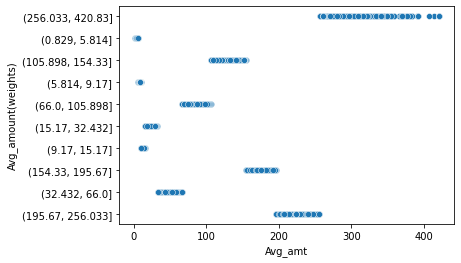

In [23]:
# 1b Convert the Avg_amount to deciles (0,1,2,...,9) by creating a new variable,
# Avg_amount(weights) such that the higher the Avg_score, the higher the weight.
Avg_score = df1["Avg_amt"]
deciles = 10 # No of deciles
# convert
df1["Avg_amount(weights)"] = pd.qcut(x=Avg_score, q=deciles, duplicates="drop").astype(str)
sns.scatterplot(data=df1, x="Avg_amt", y="Avg_amount(weights)");

In [27]:
# Getting a value counts to know how frequent each group appeared
df1["Avg_amount(weights)"].value_counts(ascending=False)

(5.814, 9.17]        228
(105.898, 154.33]    225
(154.33, 195.67]     225
(32.432, 66.0]       225
(256.033, 420.83]    224
(0.829, 5.814]       224
(9.17, 15.17]        224
(66.0, 105.898]      223
(195.67, 256.033]    222
(15.17, 32.432]      220
Name: Avg_amount(weights), dtype: int64

In [ ]:
df1[["Total_amt", "Avg_amt", "Avg_amount(weights)"]].sample(n=5, random_state=2).sort_values(ascending=True, by="Avg_amt")

,Total_amt,Avg_amt,Avg_amount(weights)
2019,22,3.67,"(0.829, 5.814]"
2053,71,11.83,"(9.17, 15.17]"
1600,562,93.67,"(66.0, 105.898]"
335,946,157.67,"(154.33, 195.67]"
1891,2069,344.83,"(256.033, 420.83]"


## Qs 2. 
* a) Calculate the percentage of the customer's Income spent on purchasing products.
    
    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

* b) Create a pie chart showing the total amount spent by the customers grouped by their `Marital_status`
    Note: Any customer that is not ***single***, ***together***, ***married*** or ***divorced*** should be considered as **others**.

In [28]:
# 2i Calculate the percentage of the customer's Income spent on purchasing products.
# cal. percentage of customers income
df1["Income_percent"] = (df1["Total_amt"]/df1["Income"])* 100
df1["Income_percent"] 

0       2.781313
1       0.058260
2       1.083602
3       0.198904
4       0.723929
          ...   
2235    2.190353
2236    0.693598
2237    2.177919
2238    1.217416
2239    0.325332
Name: Income_percent, Length: 2240, dtype: float64

In [30]:
# 2b Create a pie chart showing the total amount spent by the customers grouped by their Marital_status Note: Any customer that is not single, together, married or divorced should be considered as others.
# grouped data
# using a list comprehension and apply, filter the marital status
df1["Marital_Status"] = df1["Marital_Status"].apply(lambda x: x if x=="Single" or x=="Together" or x=="Married" or x=="Divorced" else "Others")
df1["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Others'],
      dtype=object)

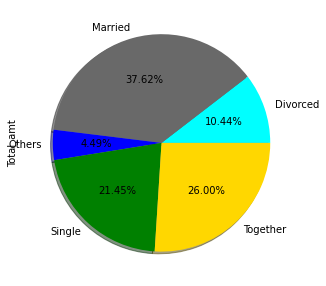

In [ ]:
# 2b A groupby

colors = ["Aqua", "DimGrey", "Blue", "Green", "Gold"]
df1_grouped = df1.groupby(by="Marital_Status")["Total_amt"].sum().plot.pie(figsize=(7,5), colors=colors, autopct="%1.2f%%", shadow=True);

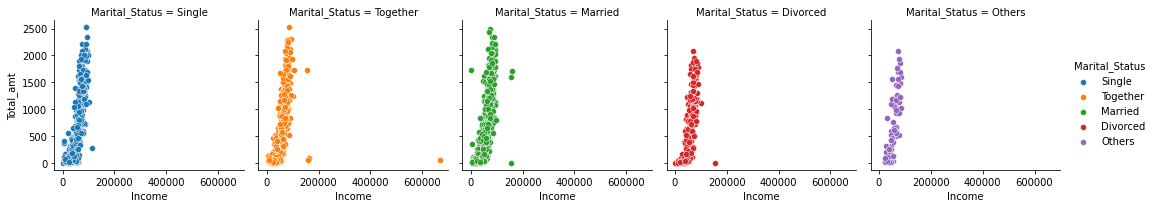

In [33]:
# getting a scatterplot to check relationship between "Total_amt" & "Income"

# plot a graph, that creates a 'FacetGrid', and passed my data to it,
# by grouping them into their 'Marital Status' by their "Income" and "Total_amont"
grid = sns.FacetGrid(df1, col="Marital_Status", hue="Marital_Status", col_wrap=5)
grid.map(sns.scatterplot, "Income", "Total_amt")
grid.add_legend()
plt.show()

# Here there is slight differences accross the five(5) categories all within the range of (0 - 200000)
# Plotting "Income_percent" rather than "Income", shows that, Income data is more spread, and the percent is slim

In [ ]:
df1[["Marital_Status", "Income_percent", "Total_amt"]].sample(n=5, random_state=2)

,Marital_Status,Income_percent,Total_amt
2053,Single,0.192271,71
2019,Together,0.072701,22
1891,Together,2.339968,2069
335,Divorced,1.520803,946
1600,Married,1.043775,562



## Qs 3.  
* a) Create a new variable called `Recency(weights)` which is obtained by dividing the `Recency` variable into quintiles (0,1,2,3,4) such that customers lower Recency values have higher weights. i.e the smaller the recency value, the greater the `Recency(weights)`.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

* b) What is the percentage of customers that accepted at least an offer after the end of the promotion campaign?

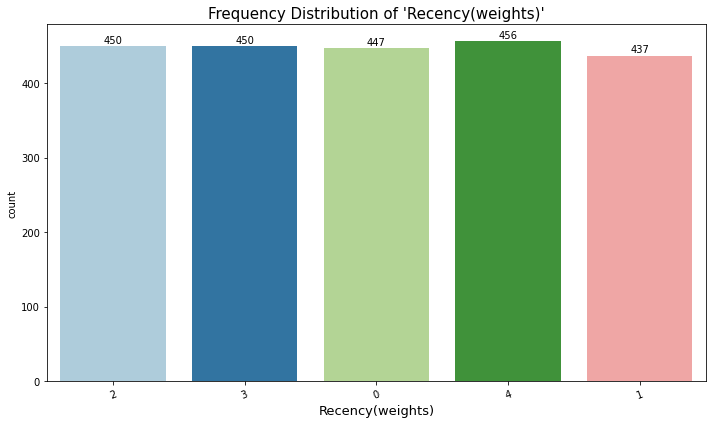

In [36]:
# 3a Enter your solution here
Recency = df1["Recency"]
quintiles = 5 # No of groups/bins
df1["Recency(weights)"] = pd.qcut(x=Recency, q=quintiles, labels=[4,3,2,1,0], duplicates="drop").astype(str)
df1["Recency(weights)"].unique()

display_count(data=df1, feature="Recency(weights)", rotation=20)

In [ ]:
# displaying a sample of my "Recency" and "Recency(weights)"
df1[["Recency", "Recency(weights)"]].sample(n=5, random_state=2).sort_values(by="Recency(weights)", ascending=False)
# N/b: customers lower Recency values have higher weights and vice-versa. 
# i.e the smaller the recency value, the greater the Recency(weights)

,Recency,Recency(weights)
335,38,3
2053,46,2
2019,75,1
1600,64,1
1891,87,0


In [ ]:
# 3b  What is the percentage of customers that accepted at least an offer after the end of the promotion campaign?
# filter accepted offer from dataframe
Accepted_offers = [var for var in df1.columns if "Accepted" in var]
df1[Accepted_offers].head(2)

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,0,0,0,0
1,0,0,0,0,0


In [ ]:
# creating new column named "Total_accepted_offers"
df1["Total_accepted_offers"] = df1[Accepted_offers].sum(axis=1)

# filter customers that only, that accepted atleast an offer
Atleast_an_offer = df1[df1["Total_accepted_offers"] >=1]

# percentage of customers that accepted atleast an offer
atleast_offer_perc = (Atleast_an_offer.shape[0]/df1.shape[0])*100
atleast_offer_perc

20.669642857142854

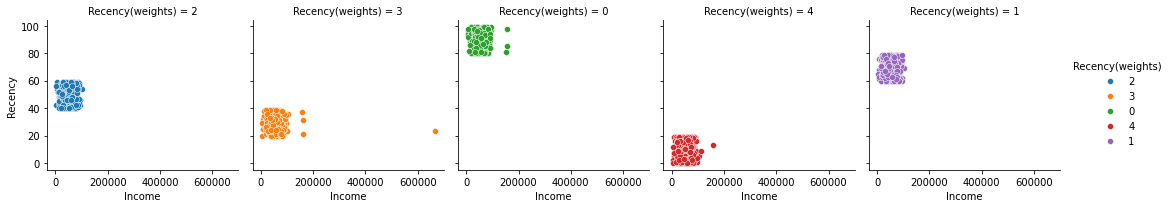

In [40]:
grid = sns.FacetGrid(df1, col="Recency(weights)", hue="Recency(weights)", col_wrap=5)
grid.map(sns.scatterplot, "Income", "Recency")
grid.add_legend()
plt.show()

# This shows a cluster in each recency weight. which still clearly shows the higher the recency, the lower the recency's weight
# The cluster is as a result of the quintle grouping 

In [ ]:
# Sample of the total amount purchased by customers
df1["Total_accepted_offers"].sample(n=5, random_state=2)

2053    0
2019    0
1891    3
335     0
1600    0
Name: Total_accepted_offers, dtype: int64

## Qs 4.  
* a) Calculate the frequency of the purchases. (Do this by finding the total number of purchases made by every customer)
* b) Create a new variable, `Frequency(weights)` by converting the result from the previous question to quartiles (0,1,2,3) such that the higher the `Frequency`, the higher the weight.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

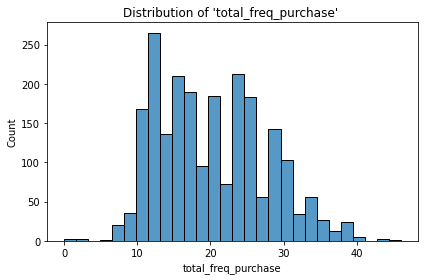

In [41]:
# 4a Calculate the frequency of the purchases.
purchases = [var for var in df1.columns if "Purch" in var or "Num" in var]
df1[purchases].head(2)

# find the total number of purchases made by every customer
df1["total_freq_purchase"] = df1[purchases].sum(axis=1)
df1["total_freq_purchase"].unique()

# use histogram_count to get frequency
plot_histogram(data=df1, feature="total_freq_purchase")

# This shows that the bulk of the data is btw '10-30' total frequent purchase. It has a fairly normal distribution shape


In [ ]:
df1["total_freq_purchase"].unique()

array([32, 11, 25, 14, 24, 28, 27, 18, 15, 22, 21, 13, 29, 17, 20, 31, 44,
       12, 23, 30, 16,  9, 19, 36, 26, 37, 10,  7, 38,  8, 33,  6, 35, 34,
       41, 46,  2,  0, 39, 40,  3,  1])

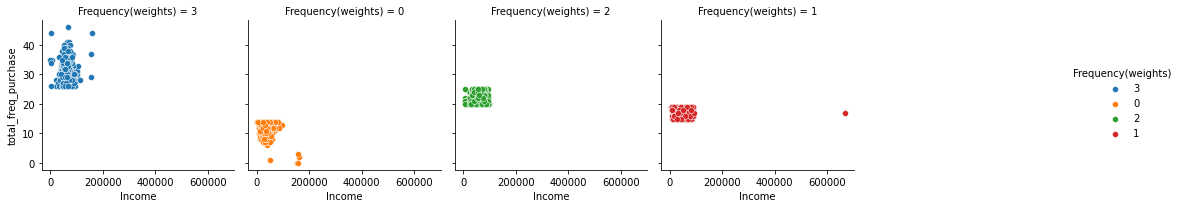

In [43]:
# 4b Create a new variable, Frequency(weights) by converting the result from the previous question to quartiles (0,1,2,3) such that the higher the Frequency, the higher the weight
Frequency = df1["total_freq_purchase"]
quartiles = 4
# covert "total_freq_purchase" to "Frequency(weights)" and store in a new column
df1["Frequency(weights)"] = pd.qcut(x=Frequency, q=quartiles, labels=np.arange(quartiles), duplicates="drop").astype(str)
df1["Frequency(weights)"].unique()


# plot a scatterplot applying a FacetGrid
grid = sns.FacetGrid(df1, col="Frequency(weights)", hue="Frequency(weights)", col_wrap=5)
grid.map(sns.scatterplot, "Income", "total_freq_purchase")
grid.add_legend()
plt.show()

# Here it shows a cluster of the total_freq_purchase and income due to the frequency(weight) grouping, whereby the higher the total_freq_purch,
# the higher the weights, even tho it isnt orderly

In [ ]:
df1[["total_freq_purchase", "Frequency(weights)"]].sample(n=5, random_state=2).sort_values(by="total_freq_purchase", ascending=False)

,total_freq_purchase,Frequency(weights)
1600,27,3
335,25,2
1891,21,2
2053,16,1
2019,12,0


## Qs 5.  
* a) Calculate the `Customer Personality Analysis` using **RFM** (Recency Frequency Monetary) value using the formula:
`Recency(weights)` + `Frequency(weights)` + `Avg_amount(weights)`. 
* b) Create a new variable called `Customer_value` by segmenting the customers using the RFM value. The RFM value should be converted into tercile (3 groups). Customer_value should have the following labels: `high_value`, `medium_value` and `low_value` which represents the binned RFM values.

    * **COMPULSORY**: Validate your resulting by running:
```python
df[["Recency(weights)", "Frequency(weights)", "Avg_amount(weights)", "RFM", "Customer_value"]].sample(n=10, random_state=2)
```

In [48]:


# 5a  Calculate the Customer Personality Analysis using RFM (Recency Frequency Monetary) value using the formula: Recency(weights) + Frequency(weights) + Avg_amount(weights)
df1["RFM"] = (df1["Recency(weights)"] + df1["Frequency(weights)"] + df1["Avg_amount(weights)"])

df1["RFM"]

0       23(256.033, 420.83]
1          30(0.829, 5.814]
2       32(105.898, 154.33]
3           30(5.814, 9.17]
4         02(66.0, 105.898]
               ...         
2235    22(195.67, 256.033]
2236      23(66.0, 105.898]
2237    02(195.67, 256.033]
2238    43(105.898, 154.33]
2239      21(15.17, 32.432]
Name: RFM, Length: 2240, dtype: object

In [49]:
# clean RFM column and convert into numericall values
df1["RFM"] = (
    df1["RFM"]\
.str.replace("(",",")\
.str.replace("]","")\
.str.split(",").apply(lambda x: [float(i) for i in x]).apply(lambda x: sum(x)/len(x))
)

df1["RFM"].head(4)

<ipython-input-49-b8a563751b14>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1["RFM"]\


0    233.287667
1     12.214333
2     97.409333
3     14.994667
Name: RFM, dtype: float64

In [50]:
# # OR using regex pattern
# pattern = r"(\d+\([\d\.]*\,\s*[\d\.]*\])"
# ff = df1["RFM"].str.extract(pattern, expand=True)
# ff = ff[0]
# ff = ff.str.replace("(", ",").str.replace("]", "").str.split(",").apply(lambda x: [float(i) for i in x]).apply(lambda x: sum(x)/len(x))
# ff

In [51]:
df1.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_amt,Avg_amt,Avg_amount(weights),Income_percent,Recency(weights),total_freq_purchase,Frequency(weights),RFM
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,269.5,"(256.033, 420.83]",2.781313,2,32,3,233.287667


In [52]:
# 5b Enter your solution here
RFM = df1["RFM"]
tercile = 3
labels = ["low_value", "medium_value", "high_value"]  # OR ["high_value", "medium_value", "low_value"]
# covert "total_freq_purchase" to "Frequency(weights)" and store in a new column
df1["Customer_value"] = pd.qcut(x=RFM, q=tercile, labels=labels, duplicates="drop").astype(str)
df1["Customer_value"].unique()

array(['high_value', 'low_value', 'medium_value'], dtype=object)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


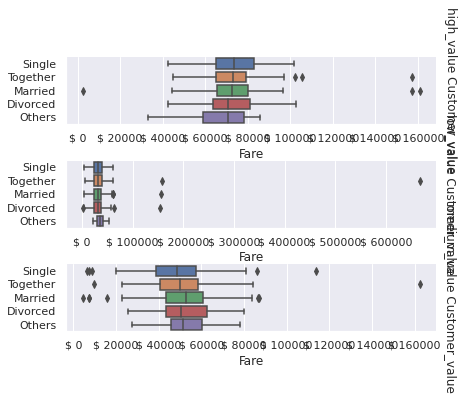

In [76]:
# A catplot of Income vs Marital Status, with Customer values as the comparison

g = sns.catplot(data=df1, x="Income", y ="Marital_Status", row ="Customer_value", kind="box", orient="h",  sharex=False, margin_titles ="True", height=1.5, aspect=4)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} Customer_value")
for ax in g.axes.flat:
  ax.xaxis.set_major_formatter("${x: .0f}")


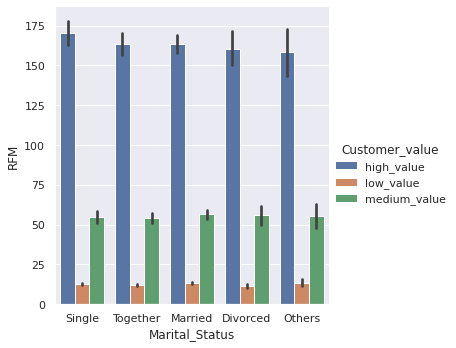

In [70]:
# plot a scatterplot applying a FacetGrid

sns.catplot(data=df1, x="Marital_Status", y ="RFM",hue ="Customer_value", kind="bar")


In [ ]:
# check sample dataframe
df1[["Recency(weights)", "Frequency(weights)", "Avg_amount(weights)", "RFM", "Customer_value"]].sample(n=10, random_state=2).sort_values(by="RFM", ascending=False)
# Here, the higher the RFM_Value, the higher the customer value.

,Recency(weights),Frequency(weights),Avg_amount(weights),RFM,Customer_value
1891,0,2,"(256.033, 420.83]",226.287667,high_value
335,3,2,"(154.33, 195.67]",127.333333,high_value
68,4,2,"(105.898, 154.33]",100.742667,high_value
1600,1,3,"(66.0, 105.898]",61.632667,medium_value
1459,1,2,"(66.0, 105.898]",61.299333,medium_value
2161,1,1,"(32.432, 66.0]",36.477333,medium_value
1026,2,0,"(15.17, 32.432]",22.534000,medium_value
2088,4,0,"(9.17, 15.17]",21.446667,low_value
2053,2,1,"(9.17, 15.17]",15.113333,low_value
2019,1,0,"(0.829, 5.814]",5.547667,low_value
